In [329]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [330]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)

numpy version: 1.21.5
pandas version: 1.4.2


# Open Programme - Heart Disease Prediction
## Tcaciuc Alexandru

## Introduction

In order to get the patient help and go further to the final diagnosis, a [primary diagnosis](https://www.health.ny.gov/statistics/sparcs/sysdoc/elements_837/principal_diagnosis_code.htm#:~:text=Definition%3A,to%20the%20hospital%20for%20care.) is needed.

- Information about the lifestyle
- Patient's examination where they get the tension/pulse/bmi. Listening of the heart and lungs. 
- Further examination of the signs of disease.
- Primary diagnosis

Symptoms
- Chest pain
- Shortness of breath
Difficulty walking - due to insufficient blood supply during physical exercise caused by affection of the vessels.

General inspection:
- Body mass index
- Blue lips - advanced disease
- Pale skin
- Edema

Inspection by body’s system:
- Auscultation, palpation, percussion:
- Lung
- Cardiovascular
- Gastrointestinal
- Urine system
- Endocrine system
- Nervous system

Concomitant diseases:
- Diabetes
- Chronic abstract pulmonary disease caused by smoking

Nocive factors:
- Smoking
- Alcohol drinking - chronic alcohol consumption can influence the cardiac muscle and dilates it, making it weaker.
- Drugs: cocaine, amphetamine, etc.


# Choosing the dataset

I've sourced these two datasets from kaggle. I will upload them and check which one is more suitable or if I can combine them.

### First dataset

This [dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. The feature that indicates presence of heart disease is called **target**.

- age
- sex
- cp - chest pain type (4 values)
- trestbps - resting blood pressure
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl
- restecg - resting electrocardiographic results (values 0,1,2)
- thalach - maximum heart rate achieved
- exang - exercise induced angina
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - unknown, 0 = normal; 1 = fixed defect; 2 = reversable defect 

It does have a very useful feature expressing a symptome: **cp - chest pain type**, but it does not include the body mass index, nocive factors, any concommitent ilnesses. 

The other features about the cardiovascular measurements might be useful for a study where the goal is replacing the specialist, but this is not the case for this project.

In [331]:
df_examination = pd.read_csv('Heart Disease Dataset.csv')
df_examination

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Second dataset

This [dataset](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) includes factors about the lifestyle and other diseases that can directly indicate that heart problems are present, such as diabetes. This data is obtained from a survey conducted in 2020 among US citizens.

- HeartDisease - target variable
- BMI - Body Mass Index
- Smoking - Have you smoked at least 100 cigarettes in your entire life?
- AlcoholDrinking - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke - Were u ever told you had a stroke?
- PhysicalHealth - For how many days during the past 30 have you experienced physical ilness or injury?
- MentalHealth - for how many days during the past 30 days was your mental health not good?
- DiffWalking - Difficulty Walking
- Sex - Are you male or female? No other options.
- AgeCategory - Fourteen-level age category
- Race - Imputed race/ethnicity value
- Diabetic - Were u ever told you had diabetes?
- PhysicalActivity - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- GenHealth - Would you say that in general your health is... (5 unique choises)
- SleepTime - On average, how many hours of sleep do you get in a 24-hour period?
- Asthma - Were u ever told you had asthma?
- KidneyDisease - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer - Were u ever told you had skin cancer?

The feature that indicates a heart disease is also binary and called **HeartDisease**.
It is way bigger than the previous one. Includes data that the specialist pointed out like smoking, drinking and **BMI**. 

Regarding the societal impact, thanks to the **Race** and **Sex** feature, during data understanding I will try to check whether it might or might not be influenced by the racial factor.

#### Considering these factors, I ended up chosing this dataset.

In [332]:
df_lifeStyle = pd.read_csv("heart_2020_cleaned.csv")
df_lifeStyle

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


 # Exploring the data and understanding it

## Missing data and duplicates

In [333]:
print(f"Missing data among all columns:\n\n{df_lifeStyle.isnull().sum()}")

Missing data among all columns:

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


This dataset is clean and I do not see any missing data among the columns.

In [334]:
print("duplicated data among columns:")
df_lifeStyle.duplicated().value_counts()

duplicated data among columns:


False    301717
True      18078
dtype: int64

Since the data includes a copious amount of real human beings. I suspect that the duplicates are formed naturally and not as a result of a mistake. The duplicates are better not removed.

## Checking age groups

As the professional said, most cardiac diseases are among older age groups, I will try to plot that to make sure the data fits the reality.

This is a graph on how many of each groups have provided with data. 

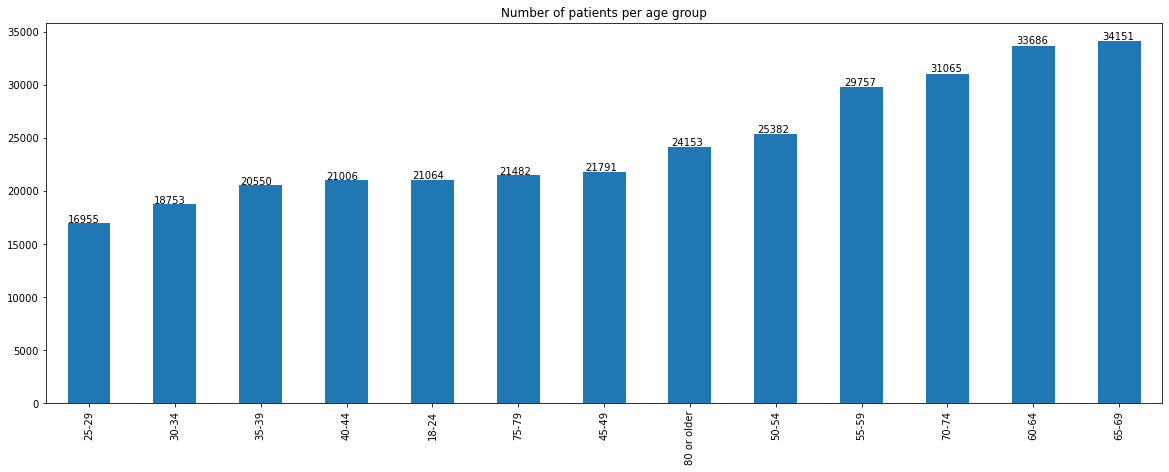

In [335]:
ageSeries = df_lifeStyle['AgeCategory'].value_counts().sort_values(ascending=True)
ax = ageSeries.plot(kind = "bar", title = 'Number of patients per age group', figsize=(20,7))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

We can notice that there the data is not spread evenly(not a great distrubution), to better decide if I should balance it or not I will try to get more deep into the other features.

Now I will try to plot only the cases where people actually have a disease.

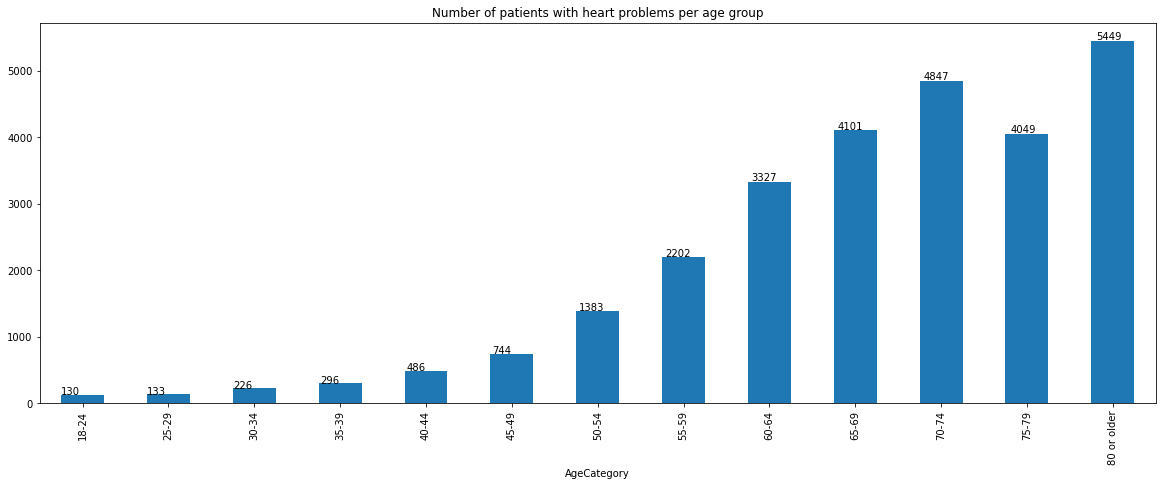

In [336]:
ageAndDisease = df_lifeStyle[df_lifeStyle['HeartDisease'] == 'Yes'].groupby(['AgeCategory'])['HeartDisease'].count()
ax = ageAndDisease.plot(kind = "bar", title = 'Number of patients with heart problems per age group', figsize=(20,7))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

The heart diseases among older groups grow exponentially, even if I try to balance out the age groups presented in the upper graph, the results in the machine learning will not differ much.

Looks like this part matches with the reality and I will definelty use the age feature for the future in machine learning.

## Smoking

I expect the smoking feature to highly correlate as its the most popular nocive factor, I will check for sick and smoking people.

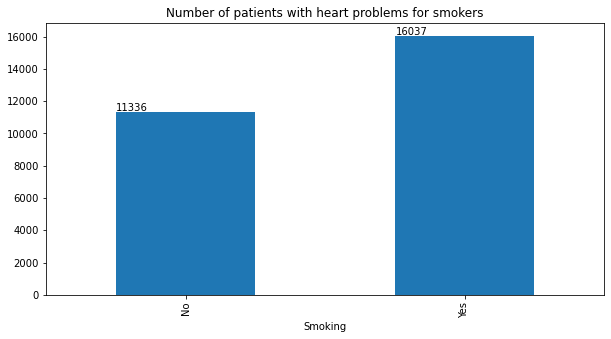

In [337]:
smokingAndDisease = df_lifeStyle[df_lifeStyle['HeartDisease'] == "Yes"].groupby(['Smoking'])['HeartDisease'].count()
ax = smokingAndDisease.plot(kind = "bar", title = 'Number of patients with heart problems for smokers', figsize=(10,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
del smokingAndDisease

In the graph above, we can see that most of the patients that have a heart problem do smoke.
Now I will try to check how the smoking habit preserves with age and will the sumber of smokers be higher in the higher risk age groups.

This will help me decide if it is a good feature for this dataset.

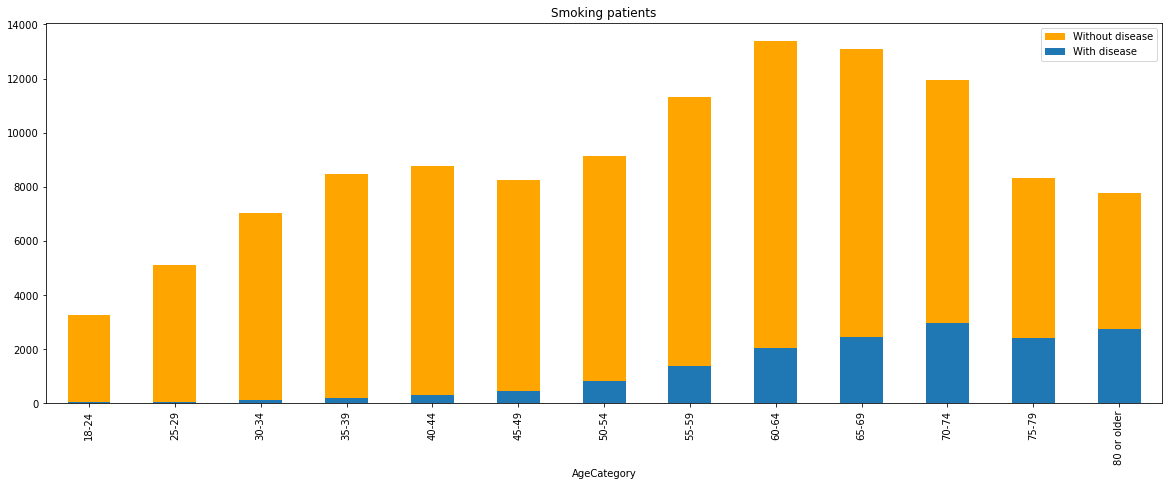

In [338]:
smokingAndAge = df_lifeStyle[df_lifeStyle['HeartDisease'] == 'No']
smokingAndAge = smokingAndAge[smokingAndAge['Smoking'] == 'Yes'].groupby(['AgeCategory'])['HeartDisease'].count()
smokingAndAge.plot(kind = "bar", title = 'Smoking patients with heart diseases', color = 'orange', figsize=(20,7))
smokingAndAge1 = df_lifeStyle[df_lifeStyle['HeartDisease'] == 'Yes']
smokingAndAge1 = smokingAndAge1[smokingAndAge1['Smoking'] == 'Yes'].groupby(['AgeCategory'])['HeartDisease'].count()
smokingAndAge1.plot(kind = "bar", title = 'Smoking patients',figsize=(20,7))
plt.legend(['Without disease','With disease'])

del smokingAndAge
del smokingAndAge1

In the graph we can see that with time, the proportion of people with disease represented by the blue bars becomes higher among smokers. Apparently there is a correlation and makes it useful as a feature for modelling.


## Diabetes

[Diabetes](https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html#:~:text=It%27s%20the%20leading%20cause%20of,are%20to%20have%20heart%20disease.) has high impact on the cardiac system since high blood sugar damages blood vessels.

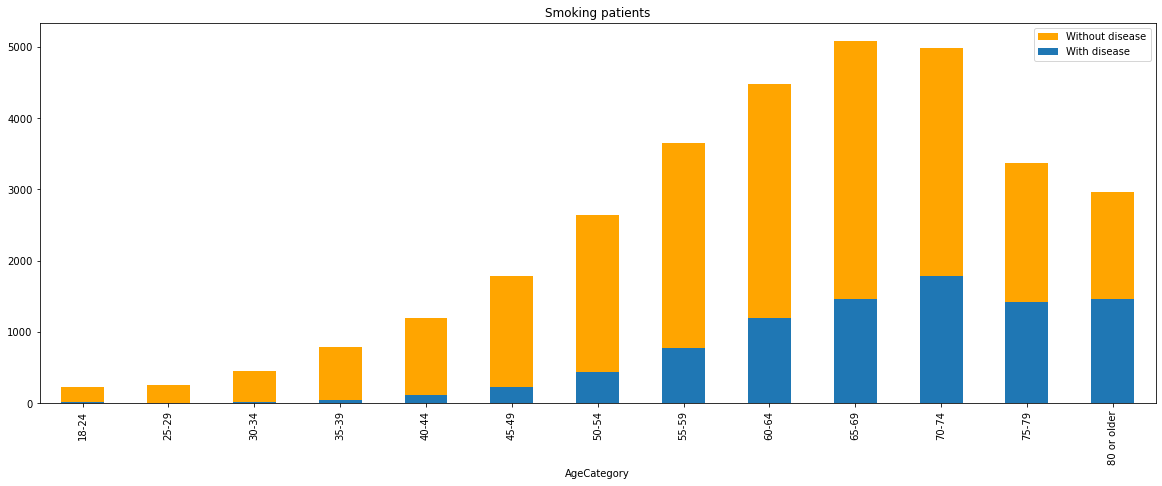

In [342]:
smokingAndDiabetes = df_lifeStyle[df_lifeStyle['HeartDisease'] == 'No']
smokingAndDiabetes = smokingAndDiabetes[smokingAndDiabetes['Diabetic'] == 'Yes'].groupby(['AgeCategory'])['HeartDisease'].count()
smokingAndDiabetes.plot(kind = "bar", title = 'Smoking patients with heart diseases', color = 'orange', figsize=(20,7))
smokingAndDiabetes1 = df_lifeStyle[df_lifeStyle['HeartDisease'] == 'Yes']
smokingAndDiabetes1 = smokingAndDiabetes1[smokingAndDiabetes1['Diabetic'] == 'Yes'].groupby(['AgeCategory'])['HeartDisease'].count()
smokingAndDiabetes1.plot(kind = "bar", title = 'Patients with diabetes',figsize=(20,7))
plt.legend(['Without disease','With disease'])

del smokingAndDiabetes
del smokingAndDiabetes1

As expected, the correlation is very strong and it will be a great asset for machine learning. As in the previous suitable features, the age category which is the most at risk has the most cases of such behaviour.

## Difficulty walking feature
People prone to heart diseases also experience a shortness of breath while trying to stand up from the bed and using the stairs. I decided to also check DiffWalking to see that.

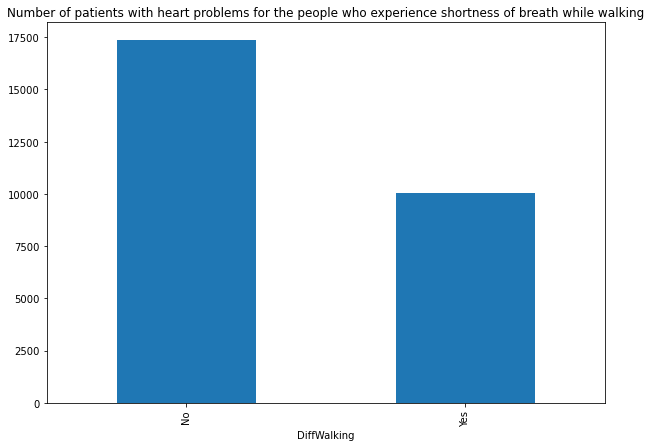

In [304]:
walkingAndDisease = df_lifeStyle[df_lifeStyle['HeartDisease'] == 'Yes'].groupby(['DiffWalking'])['HeartDisease'].count()
walkingAndDisease.plot(kind = "bar", title = 'Number of patients with heart problems for the people who experience shortness of breath while walking', figsize=(10,7))
del walkingAndDisease


It is indeed weird that people who have a difficulty walking are less that the ones that do not among the ones sick. Of course, there could be other reasons for it because we dont know the reasoning behind it for every individual.



Maybe it will unfold its characteristics with other features. Let's take for example age groups, but since the young people are unlikely to get difficulty walking, I will filter only for older age groups.

Also I will display the number of sick and not sick people to compare how common it is among the sick ones.

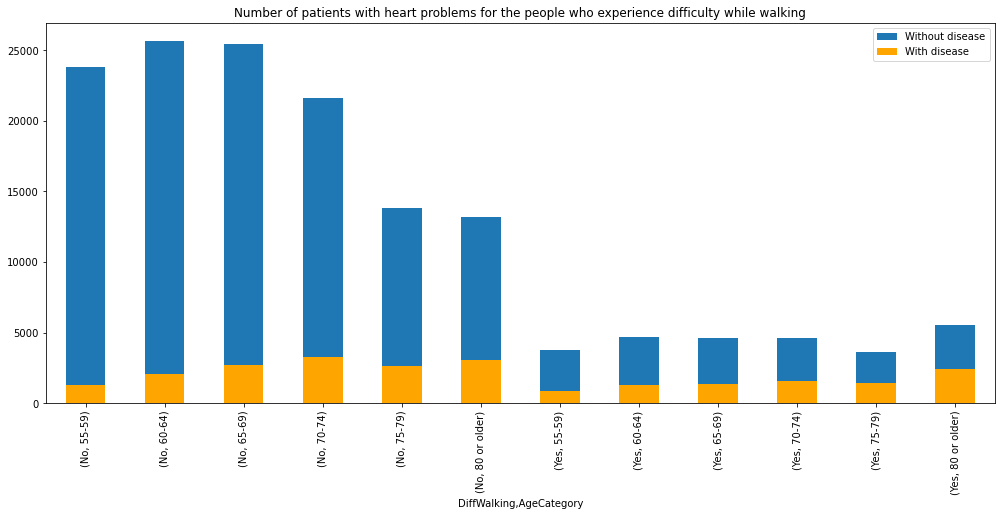

In [305]:
oldAndWalking = df_lifeStyle[df_lifeStyle['AgeCategory'].isin(['55-59','60-64','65-69','70-74','75-79','80 or older'])]
oldAndWalking1 = oldAndWalking[oldAndWalking['HeartDisease'] == 'No'].groupby(['DiffWalking','AgeCategory'])['HeartDisease'].count()
oldAndWalking2 = oldAndWalking[oldAndWalking['HeartDisease'] == 'Yes'].groupby(['DiffWalking','AgeCategory'])['HeartDisease'].count()
oldAndWalking1.plot(kind = "bar",alpha = 1, title = 'Number of patients with heart problems for the people who experience shortness of breath while walking', figsize=(17,7))
oldAndWalking2.plot(kind = "bar",alpha = 1, color = 'orange', title = 'Number of patients with heart problems for the people who experience difficulty while walking', figsize=(17,7))
plt.legend(['Without disease','With disease'])


del oldAndWalking
del oldAndWalking1
del oldAndWalking2

There are far less people with difficulty walking than who dont complain about walking. This might be related to the fact that we do not see much among the sick ones, but there is a huge difference in proportion when you check for sick and not sick ones.



I will try to check how it correlates with the smoking feature.

### Showing people with difficulty walking and the ones who have a smoking history.

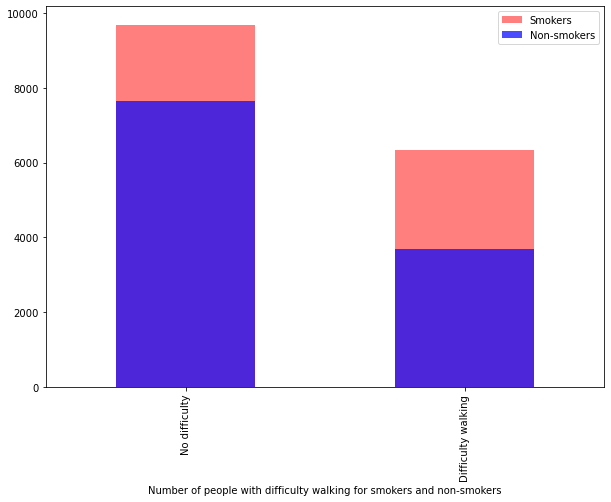

In [306]:
SAW = df_lifeStyle[df_lifeStyle['Smoking'] == 'Yes']
SAW = SAW[SAW['HeartDisease'] == 'Yes'].groupby(['DiffWalking','Smoking'])['HeartDisease'].count()
NSAW = df_lifeStyle[df_lifeStyle['Smoking'] == 'No']
NSAW = NSAW[NSAW['HeartDisease'] == 'Yes'].groupby(['DiffWalking','Smoking'])['HeartDisease'].count()
ax = SAW.plot.bar(alpha=0.5, color = 'r', figsize=(10,7))
NSAW.plot.bar(alpha=0.7, color = 'b', figsize=(10,7))
ax.set_xticklabels(['No difficulty','Difficulty walking'],rotation=90)
plt.xlabel("Number of people with difficulty walking for smokers and non-smokers")
plt.legend(['Smokers','Non-smokers'])

del SAW
del NSAW

These features behave in the same way, they can add much value for training as they both might make the task easier as more features point to the same problem.

## Gender

When filtering for gender, we can see a slight difference, but I do not consider it unbalanced so I will not try to balance it.

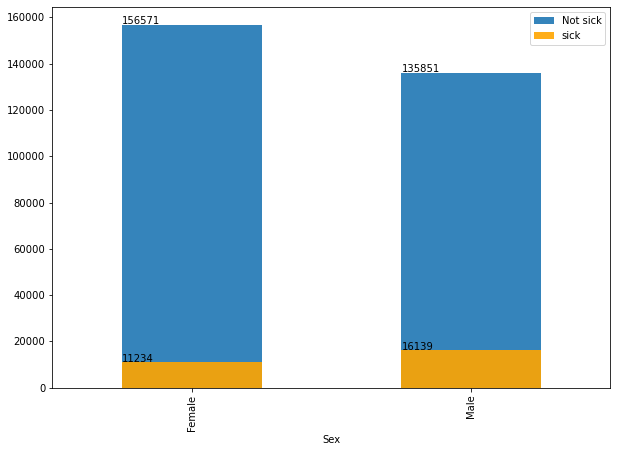

In [307]:
genderSick = df_lifeStyle[df_lifeStyle['HeartDisease'] == 'Yes'].groupby(['Sex'])['HeartDisease'].count()
genderNotSick = df_lifeStyle[df_lifeStyle['HeartDisease'] == 'No'].groupby(['Sex'])['HeartDisease'].count()
ax = genderNotSick.plot(alpha = 0.9, kind = "bar",figsize=(10,5))
genderSick.plot(alpha = 0.9, color = 'orange',kind = "bar",figsize=(10,7))
plt.legend(['Not sick','sick'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

del genderSick
del genderNotSick

## Racial factor

It is also important that the algorithm does not get a race bias. This is not a strongy defined goal of the project but it is useful to get into it as it is not convenient to hear from the newsletter that a medical clinic has technology that discriminates by race.

I will filter for race in order to see the balance between them.

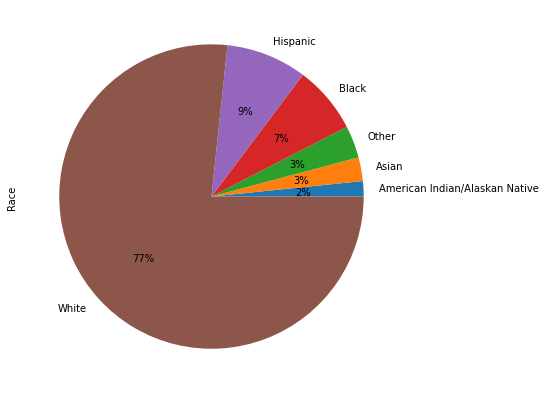

In [308]:
ax = df_lifeStyle["Race"].value_counts().sort_values(ascending=True).plot(kind = "pie", figsize=(20,7),autopct='%1.0f%%')

The proportion of one category is significantly higher than all others. This might be related to the fact that the data is collected in the [United States, where the european genetics are in the majority](https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States).

I will try to filter to see if also among those sick this imbalance is present

<AxesSubplot:ylabel='HeartDisease'>

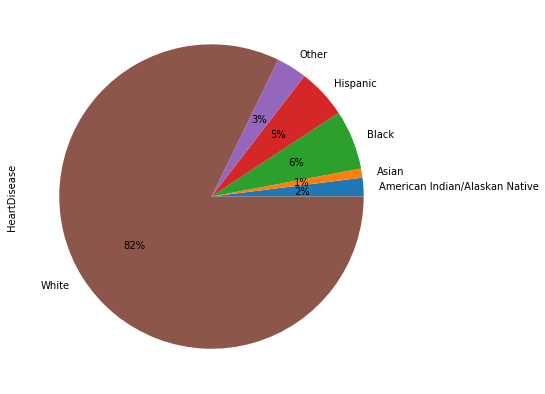

In [309]:
df_lifeStyle[df_lifeStyle['HeartDisease'] == 'Yes'].groupby(['Race'])['HeartDisease'].count().plot(kind = "pie",figsize=(20,7),autopct='%1.0f%%')

Indeed, the **White** category exceeds the rest of the categories by 5.46 times which can bias the machine learning model towards that specific category. Asians, Native Americans and all the rest can get a prediction untrue to them. A thing I can do is see how it correlates with the rest of the features.

## Data preparation

### Data cleaning

I decided to not take in consideration several features: KidneyDisease and SkinCancer.

Kidney diseases and SkinCancer are a concommitenct condition, but they are another topic and not mentioned by the specialist. 

In [310]:
df_lifeStyle = df_lifeStyle.drop(['KidneyDisease', 'SkinCancer'],axis = 1)

In my experience, checking for correlations with a heatmap before proceeding to machine learning is recommended, since it can reveal issues regarding the dataset which should be fixed in this part.

In order to check for correlations and be able to use the features for machine learning, the categorical data should be converted to numerical.

### Converting data to numerical

In [311]:
for c in ['HeartDisease','Smoking','AlcoholDrinking','Stroke', 'DiffWalking','Sex','AgeCategory','Race','Diabetic', 'PhysicalActivity', 'GenHealth','Asthma']:
    df_lifeStyle[c] = pd.factorize(df_lifeStyle[c])[0]
df_lifeStyle

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,0,16.60,0,0,0,3.0,30.0,0,0,0,0,0,0,0,5.0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,1,0,1,0,0,7.0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,2,0,0,0,1,8.0,0
3,0,24.21,1,0,0,0.0,0.0,0,0,3,0,1,1,2,6.0,1
4,0,23.71,1,0,0,28.0,0.0,1,0,4,0,1,0,0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,0,0,0,7.0,0.0,1,1,6,5,0,1,1,6.0,0
319791,0,29.84,0,0,0,0.0,0.0,0,1,10,5,1,0,0,5.0,0
319792,0,24.24,1,0,0,0.0,0.0,0,0,8,5,1,0,2,6.0,1
319793,0,32.81,1,0,0,0.0,0.0,0,0,12,5,1,1,2,12.0,1


## General preprocessing of the data

Since I plan to create multiple iterations trying different features, I will first do some preprocessing to fit them all.

A heatmaps is an easy way to check for correlating features with the target variable **HeartDisease**.

<AxesSubplot:>

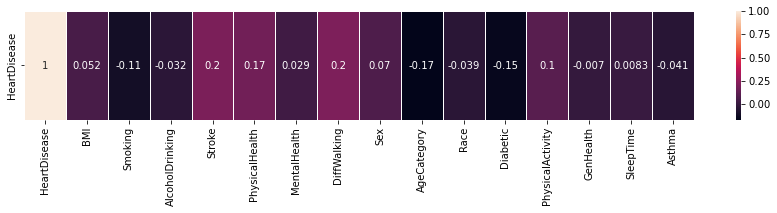

In [312]:
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(df_lifeStyle.corr().loc[df_lifeStyle.columns.intersection(['HeartDisease'])], linewidths=.5, ax = ax, annot = True)

The correlations indicate that the features are pretty distant from correlating with the target variable, even though during understanding I have seen clear correlation. Might be useful to check for balance.

### Imbalanced data

0    292422
1     27373
Name: HeartDisease, dtype: int64

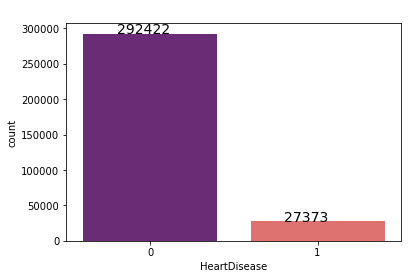

In [313]:
df_count = df_lifeStyle['HeartDisease'].value_counts()
ax = sns.countplot(x = 'HeartDisease', data = df_lifeStyle, palette = 'magma')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', color='black', size=14)
df_count

Indeed, the imbalance is huge. In this case I can either undersample or oversample. Oversamplin is not a great choice since im artificially doubling real patienrs, so I will try to undersample the case **0** to match the number of the case **1**. For this I will use the numpy scripy to randomly remove the exceeding **265049** rows from case **0**.

<AxesSubplot:>

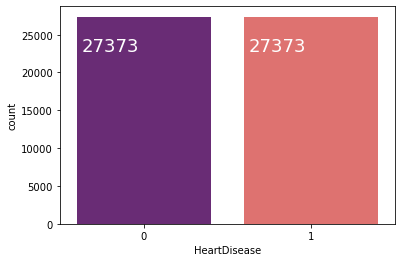

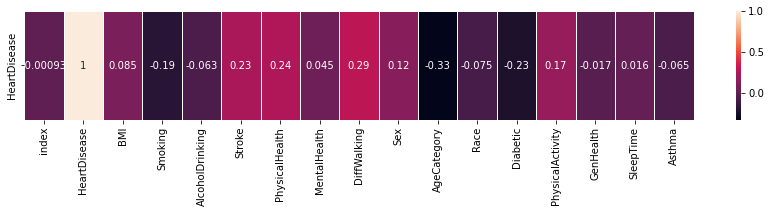

In [314]:
drop_indices = np.random.choice(df_lifeStyle['HeartDisease'].loc[lambda x: x==0].index, 265049, replace=False)
df_subset = df_lifeStyle.drop(drop_indices)
df_subset = df_subset.reset_index()

ax = sns.countplot(x = 'HeartDisease', data = df_subset, palette = 'magma')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(df_subset.corr().loc[df_subset.columns.intersection(['HeartDisease'])], linewidths=.5, ax = ax, annot = True)

Now we can see better correlations. This will help me to do better feature selection.

### Gender
 Theere is still a slight imbalance in gender, but I do not consider it significant or needed to extra balance. It is not enough for the model to get biased.

<AxesSubplot:xlabel='Sex', ylabel='count'>

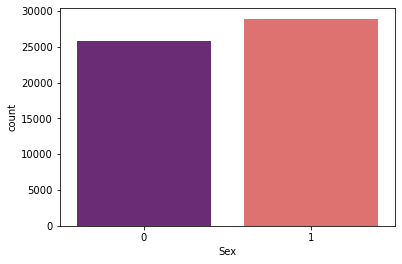

In [250]:
sns.countplot(x = 'Sex', data = df_subset, palette = 'magma')

### Race

I also see that the correlation for Race is pretty weak. I will run the pie chart again to see the balancing. Also I will run a heatmap to see the correlations with all the other features.

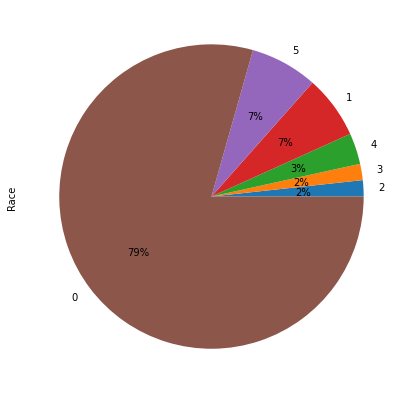

In [251]:
ax = df_subset["Race"].value_counts().sort_values(ascending=True).plot(kind = "pie",figsize=(20,7),autopct='%1.0f%%')

<AxesSubplot:>

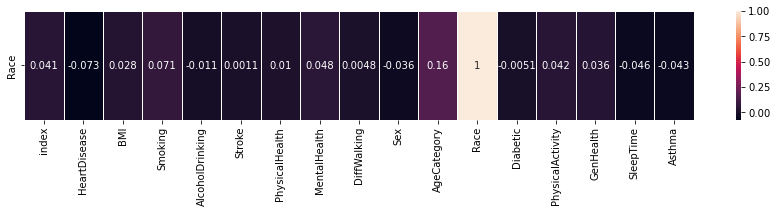

In [255]:
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(df_subset.corr().loc[df_subset2.columns.intersection(['Race'])], linewidths=.5, ax = ax, annot = True)

It is indeed unbalanced. I will try to balance it the same way I did with the HeartDisease and see if I can prevent the algorithm form being biased.

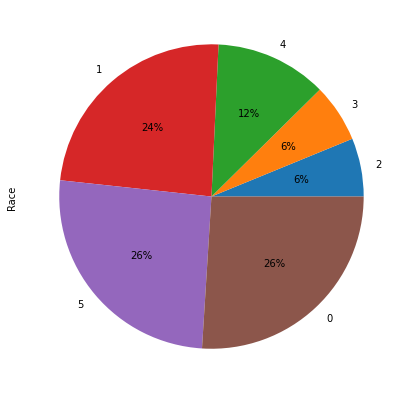

In [253]:
drop_indices1 = np.random.choice(df_subset['Race'].loc[lambda x: x==0].index, 39506,replace = False)
df_subset2 = df_subset.drop(drop_indices1)
df_subset2 = df_subset2.reset_index()
ax = df_subset2["Race"].value_counts().sort_values(ascending=True).plot(kind = "pie",figsize=(20,7),autopct='%1.0f%%')

Now we can see that the data is more balanced race-wise. This should be enough to make a conclusion about if it is worth it to balance it further to give all the categories a bigger chance.

### Correlation matrix for data balanced for race

<AxesSubplot:>

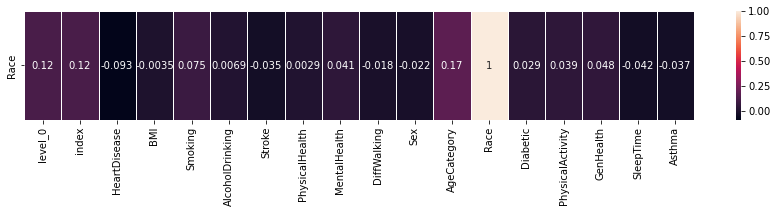

In [254]:
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(df_subset2.corr().loc[df_subset2.columns.intersection(['Race'])], linewidths=.5, ax = ax, annot = True)

The correlation for Race has not become significanly higher. I will not try to use it for modeling or balance it further since it is not in the priority of the project.

### Choosing features

I will try to chose several features and combine them in different iterations, trying to find a better result.

Iteration 1: The best correlating features but excluding strokes. Strokes are a direct consequence of a heart disease, unlike diabetes which is a cause of heart disease and is more appropriate for this model. I will test this feature in another iteration to see how the model will change its behaviour.

**'Smoking', 'PhysicalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity'**.

Iteration 2: 
For this one I tried chosing the three best correlating features to see if the SVM would behave the same or close to it.

**'PhysicalHealth', 'DiffWalking', 'AgeCategory'**.

Iteration 3: For this iteration I decided to thest with the stroke feature.

**'Stroke', 'DiffWalking', 'AgeCategory'**.



# Modelling
Each iteration will start with scaling.

Modelling algorithms I am going to use:

- kNN - Fast and easy to test with
- SVC - Sigmoid. Allows for fine-tuning. Most suitable for binary problems due to its mathematical way of working.

## Iteration 1

### Preprocessing

In [222]:
df_forscale_1 = df_subset[['Smoking', 'PhysicalHealth', 'DiffWalking',
                           'Sex',
                           'AgeCategory', 'Diabetic', 'PhysicalActivity']]
scaler_1 = StandardScaler().fit(df_subset.loc[:,df_forscale_1.columns])
scaled_1 = scaler_1.transform(df_subset.loc[:,df_forscale_1.columns])

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(scaled_1, df_subset['HeartDisease'], test_size=0.25 , random_state=42)


## kNN

In [213]:
model_1 = KNeighborsClassifier()
model_1.fit(X_train_1, y_train_1)
pred_1 = model_1.predict(X_test_1)
acc_1 = accuracy_score(y_test_1, pred_1)
print(acc_1)
print(classification_report(y_test_1, pred_1,zero_division=False))

0.7106743625337912
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      6829
           1       0.69      0.78      0.73      6858

    accuracy                           0.71     13687
   macro avg       0.71      0.71      0.71     13687
weighted avg       0.71      0.71      0.71     13687



## SVC Sigmoid

In [221]:
model_1_3 = SVC(kernel = 'sigmoid', C = 2)
model_1_3.fit(X_train_1, y_train_1)
pred_1_3 = model_1_3.predict(X_test_1)
acc_1_3 = accuracy_score(y_test_1, pred_1_3)
print(acc_1_3)
print(classification_report(y_test_1, pred_1_3,zero_division=False))

0.6263607803024768
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      6829
           1       0.63      0.62      0.63      6858

    accuracy                           0.63     13687
   macro avg       0.63      0.63      0.63     13687
weighted avg       0.63      0.63      0.63     13687



## Iteration 2

### Preprocessing

In [43]:
df_forscale_2 = df_subset[['PhysicalHealth', 'DiffWalking', 'AgeCategory']]
scaler_2 = StandardScaler().fit(df_subset.loc[:,df_forscale_2.columns])
scaled_2 = scaler_2.transform(df_subset.loc[:,df_forscale_2.columns])

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(scaled_2, df_subset['HeartDisease'], test_size=0.25 , random_state=42)

## kNN

In [209]:
model_2 = KNeighborsClassifier()
model_2.fit(X_train_2, y_train_2)
pred_2 = model_2.predict(X_test_2)
acc_2 = accuracy_score(y_test_2, pred_2)
print(f'Accruacy: {acc_2}')
print(classification_report(y_test_2, pred_2,zero_division=False))

Accruacy: 0.6650836560239644
              precision    recall  f1-score   support

           0       0.72      0.54      0.62      6908
           1       0.63      0.79      0.70      6779

    accuracy                           0.67     13687
   macro avg       0.68      0.67      0.66     13687
weighted avg       0.68      0.67      0.66     13687



## SVC Sigmoid

In [227]:
model_2_3 = SVC(kernel = 'sigmoid', C = 2)
model_2_3.fit(X_train_2, y_train_2)
pred_2_3 = model_2_3.predict(X_test_2)
acc_2_3 = accuracy_score(y_test_2, pred_2_3)
print(f'Accruacy: {acc_2_3}')
print(classification_report(y_test_2, pred_2_3,zero_division=False))

Accruacy: 0.5560020457368305
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      6908
           1       0.55      0.57      0.56      6779

    accuracy                           0.56     13687
   macro avg       0.56      0.56      0.56     13687
weighted avg       0.56      0.56      0.56     13687



## Iteration 3

### Preprocessing

In [328]:
df_forscale_3 = df_subset[['Stroke', 'DiffWalking', 'AgeCategory']]

scaler_3 = StandardScaler().fit(df_subset.loc[:,df_forscale_3.columns])
scaled_3 = scaler_3.transform(df_subset.loc[:,df_forscale_3.columns])

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(scaled_3, df_subset['HeartDisease'], test_size=0.25 , random_state=42)

## kNN

In [210]:
model_3 = KNeighborsClassifier()
model_3.fit(X_train_3, y_train_3)
pred_3 = model_3.predict(X_test_3)
acc_3 = accuracy_score(y_test_3, pred_3)
print(f'Accruacy: {acc_3}')
print(classification_report(y_test_3, pred_3,zero_division=False))

Accruacy: 0.6617228026594579
              precision    recall  f1-score   support

           0       0.71      0.56      0.63      6908
           1       0.63      0.76      0.69      6779

    accuracy                           0.66     13687
   macro avg       0.67      0.66      0.66     13687
weighted avg       0.67      0.66      0.66     13687



## SVC Sigmoid

In [316]:
model_3_3 = SVC(kernel = 'sigmoid', C = 2)
model_3_3.fit(X_train_3, y_train_3)
pred_3_3 = model_3_3.predict(X_test_3)
acc_3_3 = accuracy_score(y_test_3, pred_3_3)
print(f'Accruacy: {acc_3_3}')
print(classification_report(y_test_3, pred_3_3,zero_division=False))

Accruacy: 0.655001095930445
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      6900
           1       0.65      0.64      0.65      6787

    accuracy                           0.66     13687
   macro avg       0.65      0.65      0.65     13687
weighted avg       0.65      0.66      0.65     13687



# Evaluation

In [141]:
from sklearn.metrics import confusion_matrix

### Iteration 1

Features: 'Smoking', 'PhysicalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity'.


<AxesSubplot:>

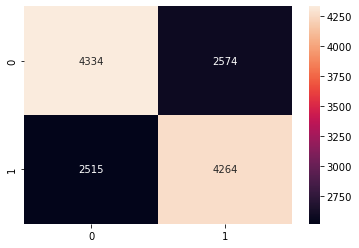

In [142]:
matrix = confusion_matrix(y_test_1, pred_1_3)
sns.heatmap(matrix, annot=True, fmt='g')

### Iteration 2

Features: 'PhysicalHealth', 'DiffWalking', 'AgeCategory'.

<AxesSubplot:>

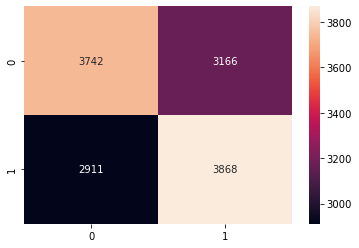

In [143]:
matrix = confusion_matrix(y_test_1, pred_2_3)
sns.heatmap(matrix, annot=True, fmt='g')

### Iteration 3

Features: 'Stroke', 'DiffWalking', 'AgeCategory'.

<AxesSubplot:>

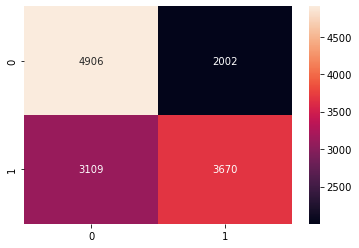

In [144]:
matrix = confusion_matrix(y_test_1, pred_3_3)
sns.heatmap(matrix, annot=True, fmt='g')

### Evaluation conclusion

All iterations have big amounts of false positives and false negatives. 
Iteration 1 has the best score and the most important features. But it will cause a mischeduling of many people in case it is used in healthcare. 

Iterations 2 and 3 do not surprise us with better results, but they are not far lower than the Iteration 1. I think that if the dataset would be enriched, we could get better result on all the feature collections.

# Conclusion

During this research, the machine learning algorithms were trained until they got the most out of the dataset. At first, during the exploratory analysis the dataset appeared that it had features that correlate very strong with the main issue which would facillitate good predictions, but the results are not that suitable for deciding for human lives. In this case both precision and recall are equally important.

On low recall, patient who needs quick attention get scheduled late, thus killing the purpose. On low precision, patients for whom prompt attention is not necessary, get scheduled earlier filling in the spots for ones who need care, thus a grid search to make the model lean towards better precision/recall is not useful.

Finally I conclude that there is far more research that can be done towards improving the predictions and therefore the product, getting provided with a better quality dataset and spending more resources on making it suitable for trainig. There can also be more research done towards seeking for biases in race and gender with better filtering.